# Covid Data Analysis

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
* Data
    * Libraries
    * Importing
    * Variables
    * Important Definitions
* Exploratory Data Analysis (EDA)
    * Plotting Objectives
    * Functions
    * Shape and Size
    * Types
    * Unique Values
    * Missing Values
    * Units Conversion
    * Numeric and Categorical Variables
        * Numeric Variables (both Continuous and Discrete)
            * Summary statistics
            * Probability Distribution
            * Outliers Detection and Treatment & Inconsistencies
        * Categorical Variables
            * Bar Plots
    * Correlation Matrix Heatmap
* Questions

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository - Cardio Data Analysis](https://github.com/caiocvelasco/health-data-analysis/blob/a4fafbcd8148a6d501f42a10ae9d313fc3b268e1/cardio-data-analysis-project.ipynb).

### Problem Definition

A client would like to understand some important patients' covid-related descriptive statistics.

### Objective
Our goal is to calculate some descriptive statistics.

## Data
Data was already available on a _csv_ format.

### Libraries

In [44]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import scipy                     # for scientific computing
import scipy.stats as stats      # for scientific computing

import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns            # for data visualization

### Importing

In [45]:
# Basic Settings
csv_folder_name = "health_dataset"  # please, change the folder name (where the CSV files are stored) if need be
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save CVSs Data on a Pandas Dataframe and Parse Date Column
df_covid_data = pd.read_csv("covid_data.csv", sep = ",", skipinitialspace = True, parse_dates = ["date"]) #skip space after delimiter if need be

# Save a Copy of the Dataframe
data     = df_covid_data.copy()

# Dataset Manipulation
data.name = "Covid Dataset" # rename the dataset
cols      = data.columns;              # create an index list with feature names

# Quick Overview of a Sample from the Data
pd.set_option('display.max_columns', None) # changing the max_columns value
data.head().T

,0,1,2,3,4
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00
new_cases,0,0,0,0,0
new_deaths,0,0,0,0,0
population,38928341.0,38928341.0,38928341.0,38928341.0,38928341.0
aged_65_older_percent,2.581,2.581,2.581,2.581,2.581
gdp_per_capita,1803.987,1803.987,1803.987,1803.987,1803.987
hospital_beds_per_thousand,0.5,0.5,0.5,0.5,0.5


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


### Variables

In [47]:
# Store the relevant Categorical Variables for analysis on a list
## There is no categorical variables.

# Store the relevant Numeric Variables for analysis on a list
num_cols = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']     


## Exploratory Data Analysis (EDA)

### Plotting Objectives
Before diving into the EDA, it is good to have a clear goal in mind. Our goal is to calculate some descriptive statistics.

Given our goal, the following points should help explore and visualize data accordingly:
 * Check features and their distributions, unidimensionally.
 * Check correlation between features, bidimensionally.

### Defining Functions for EDA

In [48]:
### DATA ANALYSIS PART ###

# Checking Shape
def data_shape(data):
    print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")

# Check Size
def data_size(data):
    print("This dataset has a total of: " + str(data.size) + " entries.")

# Check Information
def data_info(data):
    print(data.name)
    print("--------------------------------------")
    data.info()
    print("--------------------------------------")  

# Check for Duplicates
def duplicated_rows(data):
    print("There are: " + str(data.duplicated(keep='first').sum()) + " duplicated observations (not including first unique ocurrence).")

# Check for Missing Values
def missing_values(data):
    print('Checking for missing values in the', data.name) # data.name has been defined previously in the "Importing" section
    print('------------------------------------------------------------')
    print(data.isna().sum())
    print('------------------------------------------------------------')

# Save Data - Numeric & Continuous Variables
def save_num_data(data, columns_list):
    num_data = data[columns_list]
    num_data.name = "Cardio Base Dataset - Numerical Variables" # rename the dataset
    return num_data

# IQR Method - Detecting Outliers
def iqr_method(potential_outliers, data): #arg 1 takes list of features with potential outliers, arg2 
    i = 1
    for col in potential_outliers:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f'column {i}: {data[col].name}\n------------------------')
        print('1st quantile => ',Q1)
        print('3rd quantile => ',Q3)
        print('IQR =>',IQR)

        lower_bound  = Q1-(1.5*IQR)
        print('lower_bound => ' + str(lower_bound))

        upper_bound = Q3+(1.5*IQR)
        print('upper_bound => ' + str(upper_bound))
        print("\n------------------------")
        
        i = i + 1

        data[col][(data[col] < lower_bound) | (data[col] > upper_bound)] = np.nan  # replacing outliers with NaN

# Outliers Method - For Numerical Variables
def bound_method(data):
    for col in data:
        data[col][ (data[col] > data[col].quantile(0.975)) | (data[col] < data[col].quantile(0.025))] = np.nan  # replacing outliers with NaN

### VISUALIZATION PART ###

# Plot Probability Distributions - Continuous Variables
def pdf_plot_cont(data):
    for i in data:
        ax = sns.displot(data[i], kind="kde")
        plt.show()

# Plot Box Plots - Continuous Variables with Groups
def box_plot(data): # the first argument takes a list of features and the second the dataset
    for i in data:
        ax = sns.boxplot(x = data[i], orient = 'h')
        plt.show()

### Shape and Size

In [49]:
# Check Shape and Size
data_shape(data) # calls shape function
data_size(data)  # calls size function

Dataset shape: 23082 observations and 8 features.
This dataset has a total of: 184656 entries.


### Types

In [50]:
# Check Data Type
data_info(data) # calls info function

Covid Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB
--------------------------------------


All features have the expected type.

### Duplicated Values
Let's check for duplicated observations.

In [51]:
# Check for duplicates
duplicated_rows(data)

There are: 0 duplicated observations (not including first unique ocurrence).


### Missing Values

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In this dataset, there seem to be some missing values in the N/A format.

In [53]:
# Check for missing values (before treating for outliers)
missing_values(data) # calls missing values function

Checking for missing values in the Covid Dataset
------------------------------------------------------------
location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64
------------------------------------------------------------


In [54]:
# Drop missing values
data.dropna(inplace = True)

# Check for missing values (before treating for outliers)
missing_values(data) # calls missing values function

Checking for missing values in the Covid Dataset
------------------------------------------------------------
location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64
------------------------------------------------------------


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18328 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    18328 non-null  object        
 1   date                        18328 non-null  datetime64[ns]
 2   new_cases                   18328 non-null  int64         
 3   new_deaths                  18328 non-null  int64         
 4   population                  18328 non-null  float64       
 5   aged_65_older_percent       18328 non-null  float64       
 6   gdp_per_capita              18328 non-null  float64       
 7   hospital_beds_per_thousand  18328 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


### Numeric Variables

In [56]:
# Save numeric dataset into a new dataset for later use
num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Quick Overview
num_data.sample(5)

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
6361,54,5,102334403.0,5.159,10550.206,1.60
2024,0,0,9449321.0,14.799,17167.967,11.00
12543,4,0,2722291.0,19.002,29524.265,6.56
3955,1,0,555988.0,4.460,6222.554,2.10
3413,30,4,20903278.0,2.409,1703.102,0.40


#### Summary Statistics

In [57]:
# Summary Statistics - Numerical Variables
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,18328.0,7.839579e+02,6.181713e+03,-2461.000,0.000,6.000000e+00,9.800000e+01,1.335100e+05
new_deaths,18328.0,4.479578e+01,3.708932e+02,-1918.000,0.000,0.000000e+00,2.000000e+00,1.052000e+04
population,18328.0,1.268742e+08,7.507452e+08,97928.000,4105268.000,1.070898e+07,4.373376e+07,7.794799e+09
aged_65_older_percent,18328.0,1.015759e+01,6.462850e+00,1.144,4.469,8.153000e+00,1.541300e+01,2.704900e+01
gdp_per_capita,18328.0,2.333448e+04,2.123214e+04,661.240,7485.013,1.627767e+04,3.522008e+04,1.169356e+05
hospital_beds_per_thousand,18328.0,3.126064e+00,2.455111e+00,0.100,1.380,2.600000e+00,4.210000e+00,1.305000e+01


#### Probability Distributions

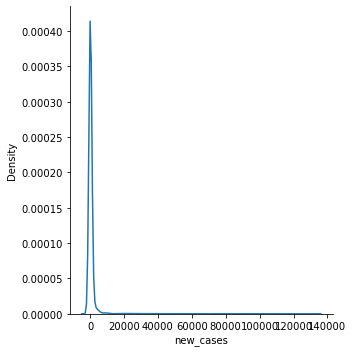

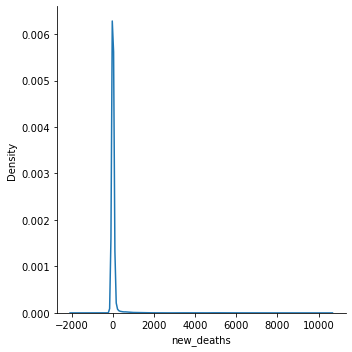

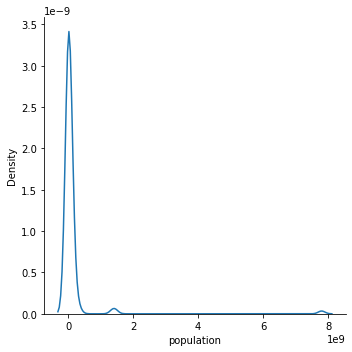

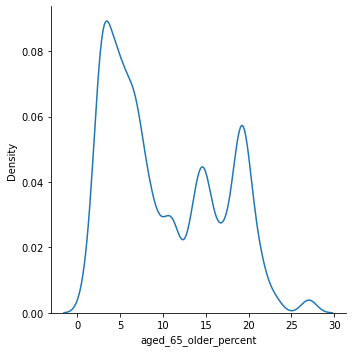

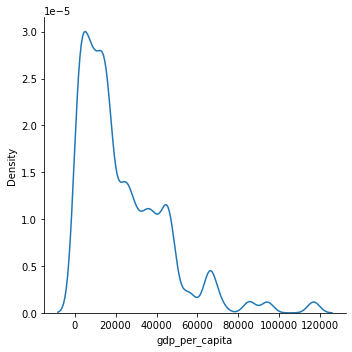

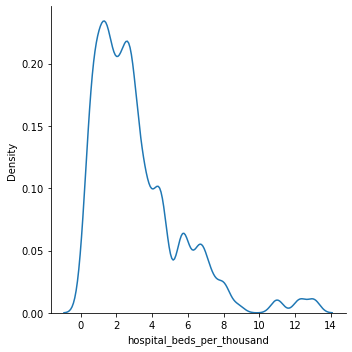

In [58]:
#### Probability Distributions (PDFs) - Numerical Variables
pdf_plot_cont(num_data) # calls pdf plot function

All features are okay. Only population seems to be strongly skewed to the right, let's focus on this.

This information is important because it supports the methods we use for:
* Outliers Detection and Treatment

#### Outliers Detection and Treatment & Inconsistencies

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. We started by looking at the probability distribution of those features and we noticed their skewness, which might indicated possible candidate features for outliers. We also looked at the summary statistics which also show unexpected values.

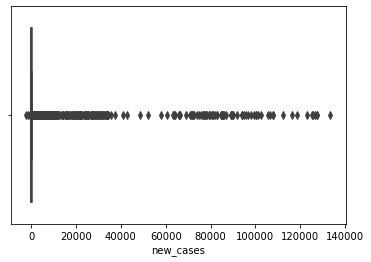

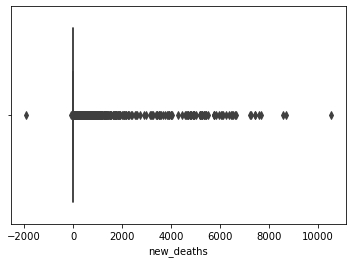

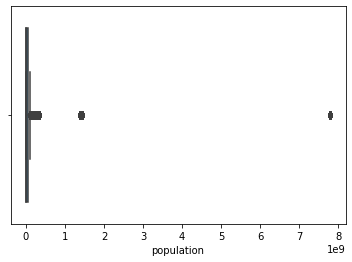

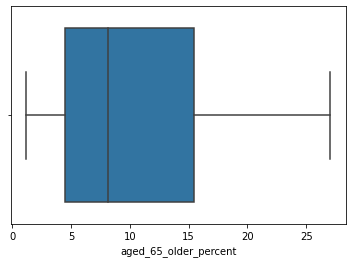

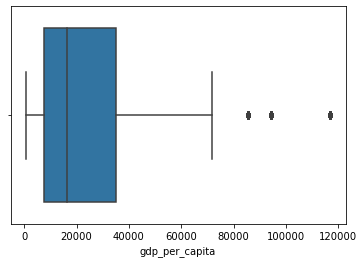

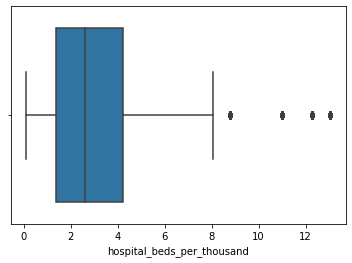

In [59]:
# Boxplots (before treating for outliers) - Numerical Variables
box_plot(num_data)

As a simple rule, we will use the IQR method.

In [60]:
potential_outliers = ['population']
# Calls the IQR Method
iqr_method(potential_outliers, data)

column 1: population
------------------------
1st quantile =>  4105268.0
3rd quantile =>  43733759.0
IQR => 39628491.0
lower_bound => -55337468.5
upper_bound => 103176495.5

------------------------


In [61]:
# Drop missing values
data.dropna(inplace = True)

# Save New Numeric Dataset without outliers as Missing Values
new_num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Summary Statistics - New Numerical Variables without outliers
new_num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,16364.0,1.959911e+02,6.697430e+02,-2461.000,0.000000e+00,5.000,7.100000e+01,1.153600e+04
new_deaths,16364.0,1.339012e+01,7.577402e+01,-1918.000,0.000000e+00,0.000,2.000000e+00,2.004000e+03
population,16364.0,1.962104e+07,2.358948e+07,97928.000,3.280815e+06,9660350.000,2.913681e+07,1.023344e+08
aged_65_older_percent,16364.0,1.021633e+01,6.478009e+00,1.144,4.412000e+00,8.153,1.656900e+01,2.302100e+01
gdp_per_capita,16364.0,2.401654e+04,2.179956e+04,661.240,7.675485e+03,16745.022,3.593837e+04,1.169356e+05
hospital_beds_per_thousand,16364.0,3.120509e+00,2.276377e+00,0.100,1.500000e+00,2.600,4.210000e+00,1.227000e+01


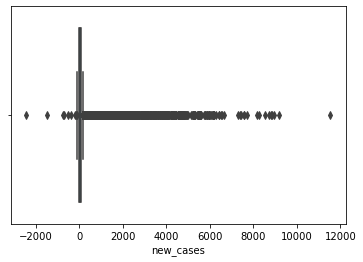

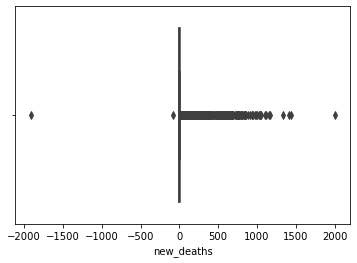

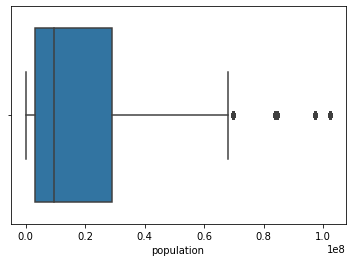

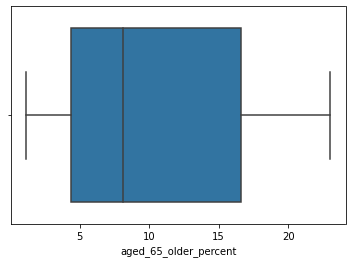

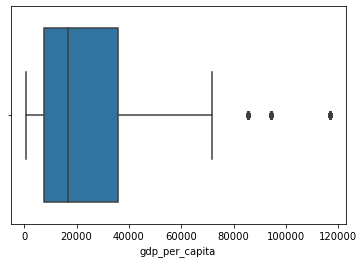

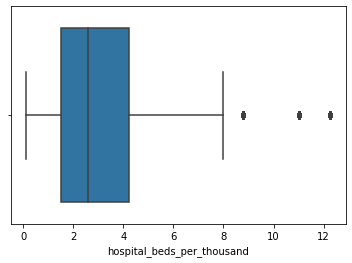

In [62]:
# Boxplots (after treating for outliers) - Numerical Variables
box_plot(new_num_data)

In [63]:
# Check for missing values (after treating for outliers) - Numeric Variables
missing_values(new_num_data) # calls missing values function

Checking for missing values in the Cardio Base Dataset - Numerical Variables
------------------------------------------------------------
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64
------------------------------------------------------------
